In [1]:
%pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Load CSV
df = pd.read_csv("wsb1201_0315.csv")

df


,type,ticker,id,text,score,timestamp,parent_post_id
0,comment_in_dd,TSLA,mhq4a7a,Im starting to feel like some of you aren't ev...,175,2025-03-14 10:32,1jb0bwm
1,comment_in_dd,SPY,mhr49b8,"lowest consumer confidence since 2022, SPY up ...",62,2025-03-14 14:28,1jb0bwm
2,comment_in_dd,TSLA,mhq49tj,I would risk my entire portfolio to see TSLA b...,57,2025-03-14 10:32,1jb0bwm
3,comment_in_dd,TESLA,mhq3hby,We only get market stability when tesla is at ...,50,2025-03-14 10:25,1jb0bwm
4,comment_in_dd,TESLA,mhqbheg,Baltimore gave up Tesla cop cars for FORD,42,2025-03-14 11:33,1jb0bwm
...,...,...,...,...,...,...,...
6254,comment_in_dd,TSLA,m1k2a69,Obviously a lot of people think TSLA is a valu...,8,2024-12-11 17:51,1hbqyji
6255,comment_in_dd,NVDA,m1kcdon,Someone here said Nvda $140 EOD you are a king...,7,2024-12-11 18:40,1hbqyji
6256,comment_in_dd,SPY,m1ii38q,As soon as I sell my long SPY calls,15,2024-12-11 12:19,1hbqyji
6257,comment_in_dd,SPY,m1iknln,TIME TO FULL PORT MY ENTIRE NET WORTH INTO SPY...,9,2024-12-11 12:40,1hbqyji


In [3]:
stock_data = pd.read_csv('../stock_price_related/all_hourly_data.csv')
stock_data

,datetime,open,high,low,close,volume,symbol
0,2024-12-11 09:30:00,137.405000,138.050003,135.210010,136.20500,48972591,NVDA
1,2024-12-11 10:30:00,136.198000,137.710010,135.440000,137.64999,22771117,NVDA
2,2024-12-11 11:30:00,137.649990,139.050003,137.179990,138.63000,21971597,NVDA
3,2024-12-11 12:30:00,138.639890,139.179990,138.230000,139.17880,14256316,NVDA
4,2024-12-11 13:30:00,139.179790,139.929990,139.100010,139.45450,16419617,NVDA
...,...,...,...,...,...,...,...
1311,2025-03-14 11:30:00,561.059998,562.429990,560.020081,560.21997,5868946,SPY
1312,2025-03-14 12:30:00,560.299990,562.799990,560.049988,561.45001,6706486,SPY
1313,2025-03-14 13:30:00,561.674990,561.950010,560.229980,560.69000,5824008,SPY
1314,2025-03-14 14:30:00,560.690000,562.750000,560.683230,561.79999,6054495,SPY


In [ ]:
import pandas as pd
import numpy as np
import torch
from torch.nn.functional import softmax
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForSequenceClassification
# Load Stock Data
stock_data = pd.read_csv('../stock_price_related/all_hourly_data.csv', parse_dates=['datetime'])
stock_data.sort_values('datetime', inplace=True)
stock_data.set_index('datetime', inplace=True)

# Calculate Volatility
def compute_volatility(df):
    ht = np.log(df['high'] / df['open'])
    lt = np.log(df['low'] / df['open'])
    ct = np.log(df['close'] / df['open'])
    Jt = np.log(df['open'] / df['close'].shift(1)) ** 2

    Pt = (ht - lt)**2 / (4 * np.log(2))
    Gt = 0.511 * (ht - lt)**2 - 0.383 * ct**2 - 0.019 * ct * (ht + lt - 2 * ht * lt)
    Rt = ht * (ht - ct) - lt * (lt - ct)

    volatility = np.log(100**2 * 252 * (1/3) * (Pt + Gt + Rt) + Jt)
    return volatility

/home/serhii/miniconda3/envs/nlp_stock/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
stock_data = pd.read_csv('../stock_price_related/all_hourly_data.csv')
stock_data

,datetime,open,high,low,close,volume,symbol
0,2024-12-11 09:30:00,137.405000,138.050003,135.210010,136.20500,48972591,NVDA
1,2024-12-11 10:30:00,136.198000,137.710010,135.440000,137.64999,22771117,NVDA
2,2024-12-11 11:30:00,137.649990,139.050003,137.179990,138.63000,21971597,NVDA
3,2024-12-11 12:30:00,138.639890,139.179990,138.230000,139.17880,14256316,NVDA
4,2024-12-11 13:30:00,139.179790,139.929990,139.100010,139.45450,16419617,NVDA
...,...,...,...,...,...,...,...
1311,2025-03-14 11:30:00,561.059998,562.429990,560.020081,560.21997,5868946,SPY
1312,2025-03-14 12:30:00,560.299990,562.799990,560.049988,561.45001,6706486,SPY
1313,2025-03-14 13:30:00,561.674990,561.950010,560.229980,560.69000,5824008,SPY
1314,2025-03-14 14:30:00,560.690000,562.750000,560.683230,561.79999,6054495,SPY


In [82]:
# Compute Volatility
stock_data['volatility'] = compute_volatility(stock_data)
stock_data['datetime_num'] = stock_data.index.astype(np.int64) // 10**9

In [10]:
# Load Reddit Data
reddit_data = pd.read_csv('wsb1201_0315.csv', parse_dates=['timestamp'])
reddit_data = reddit_data.dropna(subset=['text'])

In [11]:
# FinBERT Setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

tokenizer = AutoTokenizer.from_pretrained("LHF/finbert-regressor")
model = AutoModelForSequenceClassification.from_pretrained("LHF/finbert-regressor")

model.to(device)
model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [18]:
# Sentiment Scoring Function (with pooled_output)
def get_sentiment_score_and_features(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    inputs = {k: v.to(device) for k, v in inputs.items()}
    with torch.no_grad():
        # Get BERT encoder output first
        bert_outputs = model.bert(**inputs)
        pooled_output = bert_outputs.pooler_output
        
        # Now pass through classifier manually
        logits = model.classifier(pooled_output)
        
    score = logits.squeeze().item()  # final sentiment score
    features = pooled_output.squeeze(0).cpu().numpy()  # 768-dim feature vector

    return score, features

In [19]:
get_sentiment_score_and_features("Temp lol haha yes")

(0.5036590099334717,
 array([-3.46714079e-01,  2.64595207e-02, -3.07051539e-01, -1.07106492e-01,
         1.70661494e-01, -3.20865065e-02, -3.13090891e-01,  2.02359542e-01,
        -3.52899022e-02,  2.46917740e-01,  9.65279713e-02,  1.13422304e-01,
        -3.47627193e-01, -3.23511660e-02, -3.43714118e-01, -2.32073963e-01,
         3.55732828e-01, -1.79619581e-01,  1.83847129e-01, -1.74465343e-01,
        -1.56493485e-01, -2.40502153e-02, -1.33416444e-01,  7.89138004e-02,
        -3.31135571e-01, -2.36162513e-01,  1.84079364e-01, -2.49631777e-01,
         3.29654872e-01,  4.28092986e-01, -1.59224533e-02,  7.51597658e-02,
         1.24554403e-01, -3.31669927e-01,  1.69568658e-01, -2.12270305e-01,
         1.75460234e-01,  2.02023357e-01,  2.52784699e-01, -8.80473629e-02,
        -4.10682976e-01, -6.07687756e-02,  7.22824112e-02, -1.58134893e-01,
         3.23458463e-01, -7.52226338e-02,  4.07254934e-01,  1.86678097e-01,
        -1.76236555e-01, -2.25305229e-01, -1.34413570e-01, -5.14561

In [22]:
from tqdm import tqdm
# Apply Sentiment Scoring

# Initialize storage
sentiment_scores = []
all_features = []

# No need to use apply
for text in tqdm(reddit_data['text']):
    score, features = get_sentiment_score_and_features(text)
    sentiment_scores.append(score)
    all_features.append(features)

# After loop:
reddit_data['sentiment_score'] = sentiment_scores
all_features = np.stack(all_features)  # shape (num_samples, 768)
with open('reddit_sentiment_features.npy', 'wb') as f:
    np.save(f, all_features)

100%|██████████| 6259/6259 [00:13<00:00, 453.97it/s]


In [31]:
tsla_reddit_data = reddit_data[reddit_data['ticker'] == 'TSLA']

In [106]:
# Aggregate Sentiment Scores by Day and Hour

tsla_reddit_data['datetime_30min'] = tsla_reddit_data['timestamp'].dt.floor('30min')

tsla_reddit_data['date'] = tsla_reddit_data['datetime_30min'].dt.date
tsla_reddit_data['time'] = tsla_reddit_data['datetime_30min'].dt.time
hourly_and_daily_tesla_reddit_data = tsla_reddit_data.groupby(['date', 'time']).agg({
    'sentiment_score': 'mean'
}).reset_index()
# Combine date and hour into a single datetime column
hourly_and_daily_tesla_reddit_data['datetime'] = pd.to_datetime(hourly_and_daily_tesla_reddit_data['date'].astype(str) + ' ' + hourly_and_daily_tesla_reddit_data['time'].astype(str))
hourly_and_daily_tesla_reddit_data['datetime_num'] = hourly_and_daily_tesla_reddit_data['datetime'].astype(np.int64) // 10**9
hourly_and_daily_tesla_reddit_data = hourly_and_daily_tesla_reddit_data.sort_values('datetime_num')

/tmp/ipykernel_2528852/1524849858.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla_reddit_data['datetime_30min'] = tsla_reddit_data['timestamp'].dt.floor('30min')
/tmp/ipykernel_2528852/1524849858.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla_reddit_data['date'] = tsla_reddit_data['datetime_30min'].dt.date
/tmp/ipykernel_2528852/1524849858.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [ ]:
tsla_reddit_data['datetime_30min'] 

0      2025-03-14 10:30:00
2      2025-03-14 10:30:00
7      2025-03-14 11:30:00
8      2025-03-14 17:00:00
10     2025-03-14 12:00:00
               ...        
6245   2024-12-11 15:30:00
6248   2024-12-11 16:00:00
6249   2024-12-11 16:00:00
6251   2024-12-11 17:00:00
6254   2024-12-11 17:30:00
Name: datetime_30min, Length: 1108, dtype: datetime64[ns]

In [ ]:
# TODO: FINISHED TILL THIS LINE. Work on datetime_num, it needs to be identical for stock data and reddit data

In [99]:
hourly_and_daily_tesla_reddit_data

,date,time,sentiment_score,datetime,datetime_num
0,2024-12-11,11:00:00,0.462182,2024-12-11 11:00:00,1733914800
1,2024-12-11,12:00:00,0.500365,2024-12-11 12:00:00,1733918400
2,2024-12-11,12:30:00,0.525854,2024-12-11 12:30:00,1733920200
3,2024-12-11,13:30:00,0.104722,2024-12-11 13:30:00,1733923800
4,2024-12-11,14:00:00,-0.113358,2024-12-11 14:00:00,1733925600
...,...,...,...,...,...
502,2025-03-14,14:00:00,-0.135662,2025-03-14 14:00:00,1741960800
503,2025-03-14,14:30:00,-0.042711,2025-03-14 14:30:00,1741962600
504,2025-03-14,15:00:00,-0.087984,2025-03-14 15:00:00,1741964400
505,2025-03-14,17:00:00,-0.418017,2025-03-14 17:00:00,1741971600


In [97]:
stock_data[stock_data['symbol'] == 'TSLA']

,open,high,low,close,volume,symbol,volatility,datetime_num
datetime,,,,,,,,
2024-12-11 09:30:00,409.79999,412.53000,402.38000,409.95001,27166795,TSLA,5.315699,1733909400
2024-12-11 10:30:00,409.90100,413.98001,408.66000,412.66000,14258819,TSLA,4.693021,1733913000
2024-12-11 11:30:00,412.59000,415.00000,410.85001,413.43500,10219649,TSLA,4.233049,1733916600
2024-12-11 12:30:00,413.39999,417.85001,412.41010,417.35941,10949668,TSLA,4.405791,1733920200
2024-12-11 13:30:00,417.35172,419.90991,415.10001,419.81009,9637165,TSLA,3.586381,1733923800
...,...,...,...,...,...,...,...,...
2025-03-14 11:30:00,248.58000,249.75999,246.41040,246.81000,12018596,TSLA,5.027809,1741951800
2025-03-14 12:30:00,246.78999,249.66000,246.42149,247.98120,8209748,TSLA,5.163121,1741955400
2025-03-14 13:30:00,247.99001,249.89999,247.42000,249.10001,7760011,TSLA,4.298838,1741959000


            volatility  sentiment
2024-12-11    6.610567   0.086752
2024-12-12    5.034316   0.050271
2024-12-13    5.721432  -0.001373
2024-12-16    5.227295   0.088695
2024-12-17    5.212826   0.104029


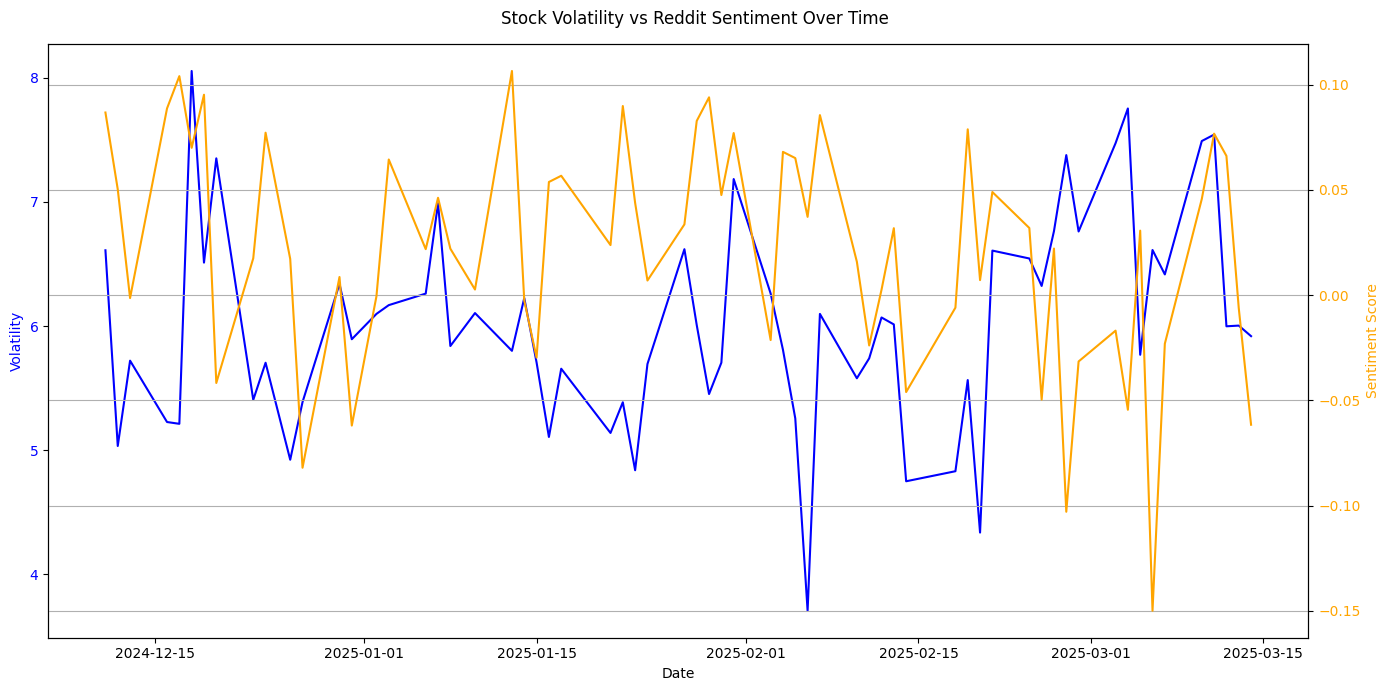

In [30]:
# --- 1. Fix stock_data to daily ---
stock_data = stock_data.copy()
stock_data.index = pd.to_datetime(stock_data.index).date  # Keep only date
stock_volatility_daily = stock_data.groupby(stock_data.index)['volatility'].mean()  # Only volatility column

# --- 2. Reddit Data: Group sentiment_Score only ---
reddit_data['date'] = pd.to_datetime(reddit_data['timestamp']).dt.date
daily_sentiment = reddit_data.groupby('date')['sentiment_Score'].mean()

# --- 3. Merge safely ---
merged = pd.merge(
    stock_volatility_daily.rename('volatility'),  # rename to match
    daily_sentiment.rename('sentiment'),
    left_index=True,
    right_index=True,
    how='inner'
)

print(merged.head())


import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(14, 7))

# First axis: Stock Volatility
ax1.plot(merged.index, merged['volatility'], color='blue', label='Stock Volatility')
ax1.set_xlabel('Date')
ax1.set_ylabel('Volatility', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Second axis: Reddit Sentiment
ax2 = ax1.twinx()
ax2.plot(merged.index, merged['sentiment'], color='orange', label='Reddit Sentiment')
ax2.set_ylabel('Sentiment Score', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Title and grids
fig.suptitle('Stock Volatility vs Reddit Sentiment Over Time')
fig.tight_layout()
plt.grid()
plt.show()
